# Import libraries

In [56]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from IPython.display import clear_output
from copy import deepcopy
%matplotlib inline

# Read data

In [3]:
cities = pd.read_csv('cities.csv')

# Calculate distance matrix

In [4]:
dist_mat = euclidean_distances(cities[["x",'y']])
dist_mat_df = pd.DataFrame(dist_mat)

In [5]:
dist_mat_df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,28.873300,82.129526,45.798532,68.350157,52.077630,72.078729,42.021184,51.016605,54.999851,28.729621,74.409471,22.710148,72.005344,45.462810
1,28.873300,0.000000,54.773225,45.658960,42.029454,43.217097,43.205582,22.769634,22.831269,30.618416,40.635151,51.106819,10.390598,51.904146,20.331958
2,82.129526,54.773225,0.000000,68.271066,45.678842,54.764850,22.758205,43.255511,40.721275,28.706295,79.494075,20.412598,64.537277,30.808909,51.039095
3,45.798532,45.658960,68.271066,0.000000,82.288911,14.401838,72.080483,30.516486,62.131194,42.025428,20.635150,50.958418,51.168335,42.911225,64.535357
4,68.350157,42.029454,45.678842,82.288911,0.000000,74.253893,22.920690,52.130340,20.358579,45.734147,82.084025,57.961693,45.640079,65.543104,22.887352
5,52.077630,43.217097,54.764850,14.401838,74.253893,0.000000,61.107538,22.702249,54.939798,30.515913,32.348203,36.731547,51.098494,28.510220,59.446348
6,72.078729,43.205582,22.758205,72.080483,22.920690,61.107538,0.000000,42.119403,22.763969,30.591751,77.534434,36.912330,51.081360,45.791797,32.374102
7,42.021184,22.769634,43.255511,30.516486,52.130340,22.702249,42.119403,0.000000,32.387302,14.549322,36.599190,32.444970,32.380180,30.525324,36.845823
8,51.016605,22.831269,40.721275,62.131194,20.358579,54.939798,22.763969,32.387302,0.000000,28.962861,61.952396,45.826845,28.982552,51.118842,10.318774
9,54.999851,30.618416,28.706295,42.025428,45.734147,30.515913,30.591751,14.549322,28.962861,0.000000,50.952978,20.488427,41.009011,22.760032,36.916192


# Plotting function

In [65]:
def plot_tour(tour, cost):
    clear_output(wait=True)
    tour = deepcopy(tour)
    n_cities = tour.shape[0]
    plt.rcParams["figure.figsize"] = [5, 5]
    X_values = deepcopy(cities["x"])
    Y_values = deepcopy(cities["y"])
    for i in range(n_cities):
        plt.text(X_values[i], Y_values[i], f"Point{i+1}")

    for i in range(n_cities-1):
        city1, city2 = tour[i], tour[i+1]
        point1 = [X_values[city1], Y_values[city1]]
        point2 = [X_values[city2], Y_values[city2]]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values, 'bo', linestyle="--")
    plt.axis('off')
    plt.grid()
    plt.title(f"Best tour path, best distance = {cost}")
    plt.show()

# nearest neighbour Algorithm

In [66]:
class nn_algorithm:
    def __init__(self, dist_mat, start_city):
        self.cities = cities
        self.dist_mat = dist_mat
        self.start_city = start_city
        
    def run(self):
        self.def_start_city(start_city)
        self.path, self.cost = self.calc_tour()
        return self.path, self.cost
        
    def def_start_city(self, start_city):
        self.start_city = (start_city - 1)
        
    def calc_tour(self):
        self.cost = 0
        
        self.path = [self.start_city]
        
        N = self.dist_mat.shape[0]
        
        mask = np.ones(N, dtype=bool)
        
        mask[self.start_city] = False

        for i in range(N-1):
            last = self.path[-1]
            next_ind = np.argmin(dist_mat[last][mask])
            next_loc = np.arange(N)[mask][next_ind]
            self.path.append(next_loc)
            mask[next_loc] = False
            self.cost += dist_mat[last, next_loc]

        return np.array(self.path), self.cost

# Example

In [67]:
start_city = 13

nn = nn_algorithm(dist_mat, start_city)
path, distance = nn.run()

In [68]:
print("Path:", path+1)
print("Distance:", distance)

Path: [13  2 15  9  5  7  3 12 14 10  8  6  4 11  1]
Distance: 261.67094258273545


# Plot path

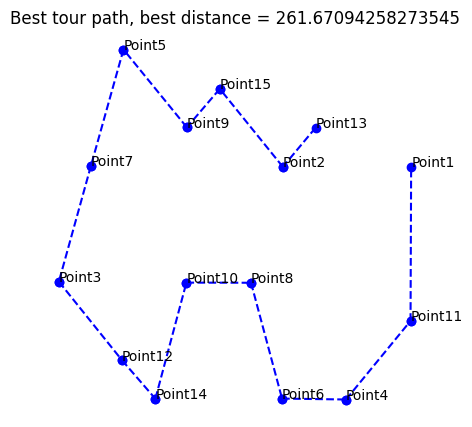

In [69]:
plot_tour(path, distance)